In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [36]:
netflix_dataset = pd.read_csv("/content/drive/MyDrive/NetflixDataSet/Copy of combined_data_1.txt.zip",header=None,usecols=[0,1],names=["CustID","Rating"])

In [37]:
netflix_dataset.head()

,CustID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [38]:
# movie count
netflix_dataset.isnull().sum()

CustID       0
Rating    4499
dtype: int64

In [39]:
movie_count=netflix_dataset.isnull().sum()["Rating"]


In [40]:
# customer counts
cust_count=netflix_dataset["CustID"].nunique()-movie_count

In [41]:
cust_count

470758

In [42]:
# rating Count
rating_count=len(netflix_dataset)-movie_count

In [43]:
rating_count

24053764

In [44]:
netflix_dataset["Rating"].value_counts()

Rating
4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: count, dtype: int64

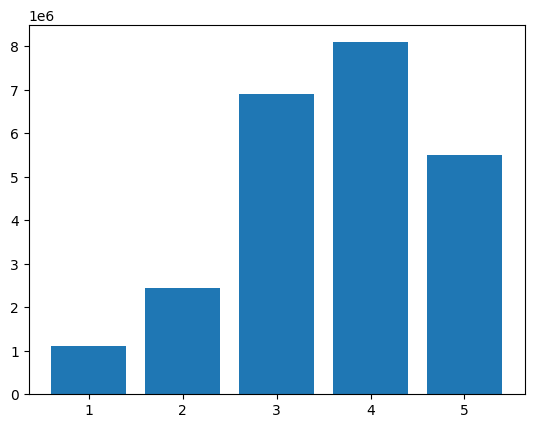

In [45]:
plt.bar(netflix_dataset["Rating"].value_counts().index,netflix_dataset["Rating"].value_counts().values)
plt.show()

In [46]:
#fixing the data to structured data

In [47]:
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [48]:
df_nan=df_nan[df_nan["Rating"]==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [49]:
df_nan=df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [50]:
Movie_id=1
movie_labels=[]
for i,j in zip(df_nan["index"][1:],df_nan["index"][:-1]):
  temp =np.full((1,i-j-1),Movie_id)
  movie_labels=np.append(movie_labels,temp)
  Movie_id=Movie_id+1

# for last record
temp_last=np.full((1,len(netflix_dataset)-df_nan.iloc[-1,0]-1),Movie_id)
movie_labels=np.append(movie_labels,temp_last)

In [51]:
movie_labels

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

In [52]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]

netflix_dataset['Movie_Id']=movie_labels.astype(int)
netflix_dataset['CustID']=netflix_dataset['CustID'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset

Now the dataset will look like: 


,CustID,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [53]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [54]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [55]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [56]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [57]:
# Filtering customers
dataset_cust_summary=netflix_dataset.groupby('CustID')['Rating'].agg(["count"])

In [58]:
dataset_cust_summary

,count
CustID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [59]:
#now we will create a benchmark
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [60]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='CustID', length=282042)

In [61]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['CustID'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [62]:
df_title = pd.read_csv("/content/drive/MyDrive/NetflixDataSet/Copy of movie_titles (1).csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])


In [63]:
df_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [64]:
!pip install scikit-surprise

**1. Find out the list of most popular and liked genre**

In [65]:
most_popular_movie_id=dataset_movie_summary.sort_values('count',ascending=False).head(10)

In [66]:
most_popular_movie_id



,count
Movie_Id,
1905,193941
2152,162597
3860,160454
4432,156183
571,154832
3938,153996
4306,151292
2452,149866
1962,145519


In [67]:
movie_id_list= most_popular_movie_id.index.tolist()


In [68]:
movie_id_list

[1905, 2152, 3860, 4432, 571, 3938, 4306, 2452, 1962, 3962]

In [69]:
for i in movie_id_list:
  print(df_title[df_title['Movie_Id']==i]['Name'].values[0])


Pirates of the Caribbean: The Curse of the Black Pearl
What Women Want
Bruce Almighty
The Italian Job
American Beauty
Shrek 2
The Sixth Sense
Lord of the Rings: The Fellowship of the Ring
50 First Dates
Finding Nemo (Widescreen)


In [70]:
netflix_dataset.head()

,CustID,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [71]:
dataset_movie=netflix_dataset.groupby('Movie_Id')['Rating'].mean(["count"])

In [72]:
most_liked_movies=dataset_movie.sort_values(ascending=False).head(10)
most_liked_movies

Movie_Id
3456    4.667269
2102    4.588016
3444    4.520370
4238    4.495253
1476    4.466834
2568    4.463280
4427    4.456323
1947    4.438146
1256    4.436311
2452    4.433863
Name: Rating, dtype: float64

In [73]:
movie_id_liked= most_liked_movies.index.tolist()
movie_id_liked


[3456, 2102, 3444, 4238, 1476, 2568, 4427, 1947, 1256, 2452]

In [74]:
for i in movie_id_liked:
  print(df_title[df_title['Movie_Id']==i]['Name'].values[0])

Lost: Season 1
The Simpsons: Season 6
Family Guy: Freakin' Sweet Collection
Inu-Yasha
Six Feet Under: Season 4
Stargate SG-1: Season 8
The West Wing: Season 3
Gilmore Girls: Season 3
The Best of Friends: Vol. 4
Lord of the Rings: The Fellowship of the Ring


 **2.Create Model that finds the best suited Movie for one
user in every genre**

In [75]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [76]:
read=Reader()

In [77]:
data=Dataset.load_from_df(netflix_dataset[['CustID','Movie_Id','Rating']][:1000000],read)

In [78]:
model=SVD()

In [79]:
cross_validate(model,data,measures=['rmse','mae'],cv=3)

{'test_rmse': array([0.96828473, 0.97308577, 0.96778395]),
 'test_mae': array([0.75769497, 0.76082661, 0.75777214]),
 'fit_time': (18.5349862575531, 13.432990312576294, 14.53218960762024),
 'test_time': (3.49924898147583, 3.963216781616211, 3.5990240573883057)}

In [80]:
# Prediction or Recomendation of the movies



In [81]:
netflix_dataset.head()

,CustID,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [82]:
# doing prediction and recomendation for any random customer lets take 1331154


In [83]:
user_1331154=df_title.copy()

In [84]:
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [85]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [86]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [87]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,4.134293
4,5,2004.0,The Rise and Fall of ECW,4.758568
5,6,1997.0,Sick,2.899157
7,8,2004.0,What the #$*! Do We Know!?,2.763350
15,16,1996.0,Screamers,2.792633
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.807938
17766,17767,2004.0,Fidel Castro: American Experience,3.807938
17767,17768,2000.0,Epoch,3.807938
17768,17769,2003.0,The Company,3.807938


**3.Find what Genre Movies have received the best and
worst ratings based on User Rating.**

In [88]:
user_1331154=user_1331154.sort_values('Estimate_Score',ascending=False)
user_1331154

,Movie_Id,Year,Name,Estimate_Score
31,32,2004.0,ABC Primetime: Mel Gibson's The Passion of the...,5.000000
214,215,1998.0,That '70s Show: Season 1,5.000000
4,5,2004.0,The Rise and Fall of ECW,4.758568
269,270,2001.0,Sex and the City: Season 4,4.679633
208,209,1996.0,Star Trek: Deep Space Nine: Season 5,4.592494
...,...,...,...,...
126,127,1987.0,Fatal Beauty,2.782062
7,8,2004.0,What the #$*! Do We Know!?,2.763350
187,188,2005.0,Dead Birds,2.708700
121,122,2002.0,Cube 2: Hypercube,2.685041


In [89]:
user_1331154_best_ratings=user_1331154.head()["Name"]

In [90]:
user_1331154=user_1331154.sort_values('Estimate_Score')
user_1331154

,Movie_Id,Year,Name,Estimate_Score
76,77,1995.0,Congo,2.398398
121,122,2002.0,Cube 2: Hypercube,2.685041
187,188,2005.0,Dead Birds,2.708700
7,8,2004.0,What the #$*! Do We Know!?,2.763350
126,127,1987.0,Fatal Beauty,2.782062
...,...,...,...,...
208,209,1996.0,Star Trek: Deep Space Nine: Season 5,4.592494
269,270,2001.0,Sex and the City: Season 4,4.679633
4,5,2004.0,The Rise and Fall of ECW,4.758568
214,215,1998.0,That '70s Show: Season 1,5.000000


In [91]:
user_1331154_worst_rating=user_1331154.head()["Name"]